In [1]:
%pylab inline
import rinobot_plugin as bot

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = bot.loadfile('./examples/data.txt')
binsize=10

(160, 185)

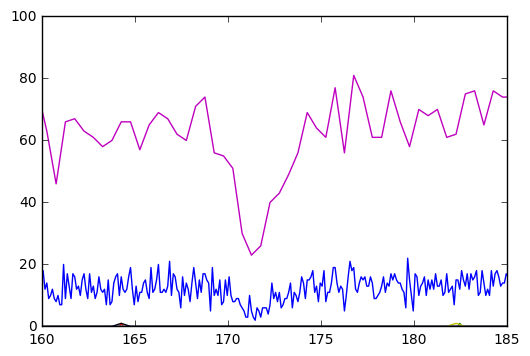

In [4]:
def rebin(data, binsize, algo='average'):
    col_num = data.shape[1]
    new_data = np.zeros((data.shape[0]// binsize, col_num))

    for index, data_row in enumerate(data.T):
        new_row = np.array([])

        for i in range(0, len(data_row) // binsize):
            sublist = data_row[i*binsize:(i*binsize)+binsize]
            if index == 0:
                new_row = np.append(new_row, sublist.mean())
            else:
                if algo == 'average':
                    new_row = np.append(new_row, sublist.mean())
                if algo == 'sum':
                    new_row = np.append(new_row, sublist.sum())
                if algo == 'max':
                    new_row = np.append(new_row, sublist.max())


        new_data[:, index] = new_row
    return new_data

new_data = rebin(data, 5, algo='sum')

plt.plot(data[:, 0], data[:, 1:])
plt.plot(new_data[:, 0], new_data[:, 1:])

plt.xlim([160, 185])